In [46]:
import os 
import re
import shelve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline

In [47]:
def get_metrics(which_range, industry, method):
    engine = create_engine("mysql+mysqldb://root:@localhost/forecastmycity")
    con = engine.connect()

    query = 'SELECT * FROM fit_metrics_pop WHERE '\
        'which_range="%s" and industry="%s" and method="%s"' %\
        (which_range, industry, method)

    df = pd.read_sql(query, con=con.connection)

    return df

def get_geo_list(industry):
    engine = create_engine("mysql+mysqldb://danielj:@localhost/forecastmycity")
    con = engine.connect()

    query = 'SELECT DISTINCT(geofips) FROM fit_data_pop WHERE '\
        'industry="%s"' % industry

    df = pd.read_sql(query, con=con.connection)

    return df.values

In [51]:
manf_metrics = {}
manf_metrics['full_AR'] = get_metrics('full', 'manf', 'AR_linreg')
manf_metrics['test_AR'] = get_metrics('test', 'manf', 'AR_linreg')
manf_metrics['full_lr'] = get_metrics('full', 'manf', 'linreg')
manf_metrics['test_lr'] = get_metrics('test', 'manf', 'linreg')

rettrd_metrics = {}
rettrd_metrics['full_AR'] = get_metrics('full', 'rettrd', 'AR_linreg')
rettrd_metrics['test_AR'] = get_metrics('test', 'rettrd', 'AR_linreg')
rettrd_metrics['full_lr'] = get_metrics('full', 'rettrd', 'linreg')
rettrd_metrics['test_lr'] = get_metrics('test', 'rettrd', 'linreg')

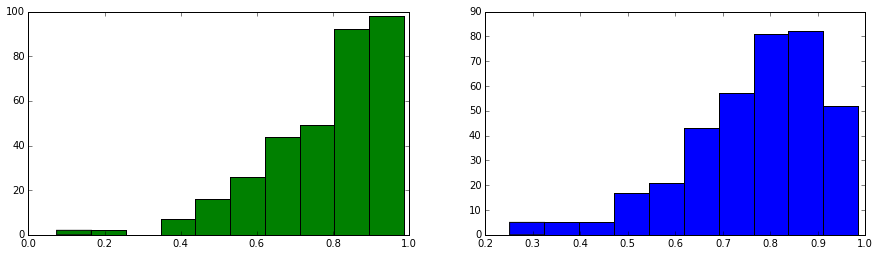

In [52]:
fig, ax = plt.subplots(1,2)
ax[0].hist(manf_metrics['full_AR']['r2'].values, color='green')
ax[1].hist(rettrd_metrics['full_AR']['r2'].values, color='blue')
fig.set_size_inches(15,4)
plt.show()

test_lr stats:
count    336.000000
mean       9.120933
std        8.902020
min        0.905842
25%        3.958417
50%        6.842047
75%       11.566847
max      104.760327
Name: mae, dtype: float64

test_AR stats:
count    333.000000
mean       8.136014
std       11.105112
min        0.891565
25%        3.111963
50%        5.075607
75%        9.021301
max      106.666443
Name: mae, dtype: float64


test_lr stats:
count    368.000000
mean       6.455108
std        4.598933
min        0.698184
25%        3.060429
50%        5.312753
75%        8.247893
max       26.528139
Name: mae, dtype: float64

test_AR stats:
count    368.000000
mean       5.068500
std        7.165411
min        0.702953
25%        2.255280
50%        3.425982
75%        5.209731
max      102.284019
Name: mae, dtype: float64



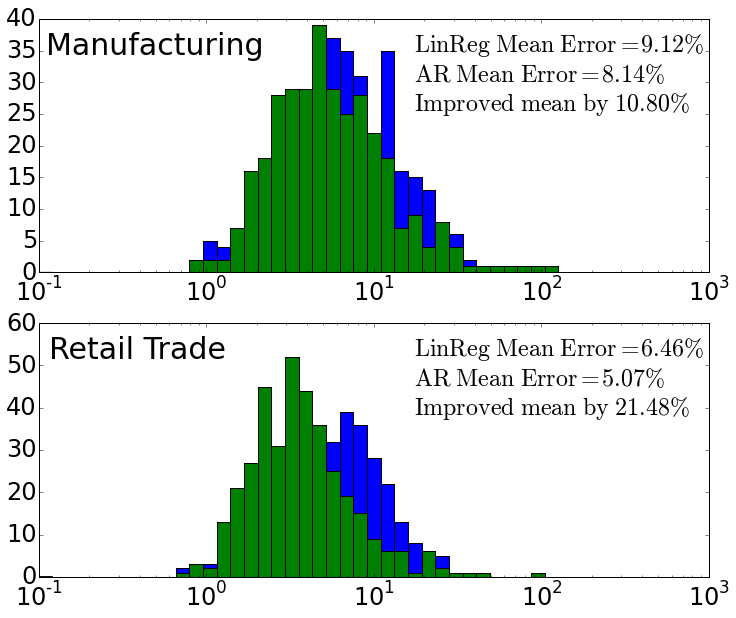

In [53]:
fig, ax = plt.subplots(2,1)
bins = [np.arange(0,10+.2,.2)]

ax[0].hist(manf_metrics['test_lr']['mae']*100, color='blue', bins=np.logspace(-1, 3, 50))
print 'test_lr stats:'
print (manf_metrics['test_lr']['mae']*100).describe()
print ''

manf_metric = manf_metrics['test_AR']['mae']*100
manf_metric = manf_metric[manf_metric < 110]
ax[0].hist(manf_metric, color='green', bins=np.logspace(-1, 3, 50))
print 'test_AR stats:'
print manf_metric.describe()
print ''
muar = manf_metric.mean()
sigmaar = manf_metric.std()
mulr = (manf_metrics['test_lr']['mae']*100).mean()
sigmalr = (manf_metrics['test_lr']['mae']*100).std()
manf_textstr = '$\mathrm{LinReg}\ \mathrm{Mean}\ \mathrm{Error}=%.2f\%%$\n$\mathrm{AR}\ \mathrm{Mean}\ \mathrm{Error}=%.2f\%%$\n$\mathrm{Improved}\ \mathrm{mean}\ \mathrm{by}\ %.2f\%%$'%(mulr, muar, 100*(1-muar/mulr))


ax[0].set_xscale("log")

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

ax[0].text(0.56, 0.95, manf_textstr, transform=ax[0].transAxes, fontsize=24,
    verticalalignment='top')
ax[0].text(0.015, 0.95, 'Manufacturing', transform=ax[0].transAxes, fontsize=30,
    verticalalignment='top')

print ''

ax[1].hist(rettrd_metrics['test_lr']['mae']*100, color='blue', bins=np.logspace(-1, 3, 50))
print 'test_lr stats:'
print (rettrd_metrics['test_lr']['mae']*100).describe()
print ''


ax[1].hist(rettrd_metrics['test_AR']['mae']*100, color='green', bins=np.logspace(-1, 3, 50))
print 'test_AR stats:'
print (rettrd_metrics['test_AR']['mae']*100).describe()
print ''
muar = (rettrd_metrics['test_AR']['mae']*100).mean()
sigmaar = (rettrd_metrics['test_AR']['mae']*100).std()
mulr = (rettrd_metrics['test_lr']['mae']*100).mean()
sigmalr = (rettrd_metrics['test_lr']['mae']*100).std()
rettrd_textstr = '$\mathrm{LinReg}\ \mathrm{Mean}\ \mathrm{Error}=%.2f\%%$\n$\mathrm{AR}\ \mathrm{Mean}\ \mathrm{Error}=%.2f\%%$\n$\mathrm{Improved}\ \mathrm{mean}\ \mathrm{by}\ %.2f\%%$'%(mulr, muar, 100*(1-muar/mulr))

ax[1].set_xscale("log")
fig.set_size_inches(12,10)

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(24)

plt.gca().text(0.56, 0.95, rettrd_textstr, transform=plt.gca().transAxes, fontsize=24,
    verticalalignment='top')
ax[1].text(0.015, 0.95, 'Retail Trade', transform=ax[1].transAxes, fontsize=30,
    verticalalignment='top')

plt.show()